# Term0 Week3 授業前課題1 
## コーディング課題：iris datasets

## 1. データの取得
説明変数をX、目的変数をyに格納

In [8]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns
import itertools

iris = load_iris()
X = pd.DataFrame(iris["data"], columns=iris["feature_names"])
y = pd.Series(iris["target"], name="Species")
print("説明変数X:\n", X)
print("目的変数y:\n", y)

説明変数X:
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
5                  5.4               3.9                1.7               0.4
6                  4.6               3.4                1.4               0.3
7                  5.0               3.4                1.5               0.2
8                  4.4               2.9                1.4               0.2
9                  4.9               3.1                1.5               0.1
10                 5.4               3.7                1.5               0.2
11                 4.8               3.4                

## 2. データの結合
X, yを結合させたDataFrame型変数dfを作成

In [9]:
df = pd.concat([X, y], axis=1)
print("DataFrame型変数df:\n", df)

DataFrame型変数df:
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
5                  5.4               3.9                1.7               0.4   
6                  4.6               3.4                1.4               0.3   
7                  5.0               3.4                1.5               0.2   
8                  4.4               2.9                1.4               0.2   
9                  4.9               3.1                1.5               0.1   
10                 5.4               3.7                1.5               0.2   
11         

## 3. データの確認
以下の4点についてコードとマークダウンを組み合わせてレポート。  
- 先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。（数値データか文字データかなど）
- ラベルごとのサンプル数の合計を出力する。
- 特徴量に欠損値があるかを確認する。
- 特徴量の平均値と標準偏差、四分位数を一度に表示させる。

In [10]:
print("先頭から4行目までのデータ：\n", df.head(4))
print("------各特徴量について------")
df.info()
print("特徴量が浮動小数点数、ラベルが整数で表現されている。")
print("------ラベルごとのサンプル数------\n", df["Species"].value_counts(ascending=True))
print("各ラベル50サンプルずつ格納されている。")
print("------各特徴量の欠損値の有無------\n", df.isnull().sum())
print("各特徴量、ラベルに欠損値はなし。")
print("------特徴量の平均値、標準偏差、四分位数------\n", df.describe().round(2))
print("上からサンプル数、平均値、標準偏差、最小値、四分位数、最大値の順に表示されている。")

先頭から4行目までのデータ：
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   

   Species  
0        0  
1        0  
2        0  
3        0  
------各特徴量について------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
Species              150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB
特徴量が浮動小数点数、ラベルが整数で表現されている。
------ラベルごとのサンプル数------
 0    50
1    50
2    50
Name: Species, dtype: int64
各ラベル50サンプルずつ格納されている。
------各特徴量の欠損値の

## 4. irisデータセット自体の調査
　irisデータセットとは、1936年にイギリスの生物統計学者であるRonald Fisherによって発表された多変量解析データセットのこと。線形分類モデルに基づき、サポートベクタマシン等の機械学習分野において多くの統計分類技術に利用される典型的なデータセットとなっている。データセットは3種のアヤメ（多年草）から各50サンプル用意されており、がくと花弁の長さと幅という4つの特徴量で構成されている。これら4つの特徴量の組み合わせに基づき、Fisherはアヤメの各種を区別するための線形分類モデルを当時開発した。

## 5. 必要なデータを抽出
DataFrameから必要なデータを抽出する方法を確認する。  
- sepal_widthの列を３つの異なる方法で抽出する
- 50番目から99番目までのデータを抽出する
- petal_lengthの列の50番目から99番目までのデータを抽出する
- petal_widthの値が0.2のデータを抽出する  

.locや.ilocの違いについても説明する。

In [11]:
sepal_width_1 = df["sepal width (cm)"] #Series
print("sepal_widthの列（1つ目の方法）:\n", sepal_width_1)
sepal_width_2 = df.loc[:, ["sepal width (cm)"]] # DataFrame
print("sepal_widthの列（2つ目の方法）:\n", sepal_width_2)
sepal_width_3 = df.iloc[:, [1]] # DataFrame
print("sepal_widthの列（3つ目の方法）:\n", sepal_width_3)

data_50_99 = df.iloc[50:100, :] # DataFrame
print("50番目から99番目までのデータ:\n", data_50_99)

petal_length_50_99 = df.iloc[50:100, 2] # Series
print("petal_lengthの列の50番目から99番目までのデータ:\n", petal_length_50_99)

petal_width_comma_2 = df[df["petal width (cm)"]==0.2] # DataFrame
print("petal_widthの値が0.2のデータ:\n", petal_width_comma_2)

sepal_widthの列（1つ目の方法）:
 0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
5      3.9
6      3.4
7      3.4
8      2.9
9      3.1
10     3.7
11     3.4
12     3.0
13     3.0
14     4.0
15     4.4
16     3.9
17     3.5
18     3.8
19     3.8
20     3.4
21     3.7
22     3.6
23     3.3
24     3.4
25     3.0
26     3.4
27     3.5
28     3.4
29     3.2
      ... 
120    3.2
121    2.8
122    2.8
123    2.7
124    3.3
125    3.2
126    2.8
127    3.0
128    2.8
129    3.0
130    2.8
131    3.8
132    2.8
133    2.8
134    2.6
135    3.0
136    3.4
137    3.1
138    3.0
139    3.1
140    3.1
141    3.1
142    2.7
143    3.2
144    3.3
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal width (cm), Length: 150, dtype: float64
sepal_widthの列（2つ目の方法）:
      sepal width (cm)
0                 3.5
1                 3.0
2                 3.2
3                 3.1
4                 3.6
5                 3.9
6                 3.4
7                 3.4
8                 2.9
9        

.locは行列のラベル（文字）で、ilocは行列の番号（数字）でそれぞれデータを指定する。

# 6. 図の作成
Matplotlibやseabornを使い、以下の図を作成する。  
- ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）
- boxplotを使いデータの分布を可視化する
- violinplotを使いデータの分布を可視化する  

boxplotとviolinplotは似た図を表示する。これらはどう違い、それぞれどのような利点があるのかも説明する。

変数labels:  ['setosa' 'versicolor' 'virginica']
変数features: 
 Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


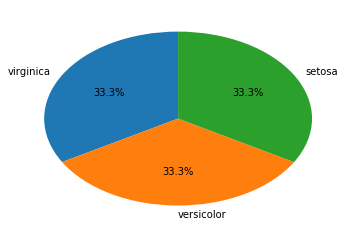

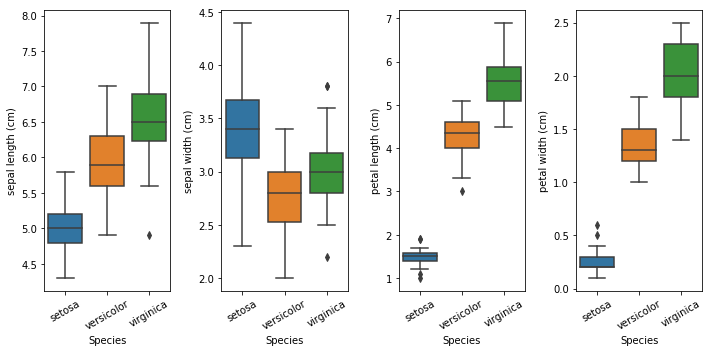

/Users/arimoto/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


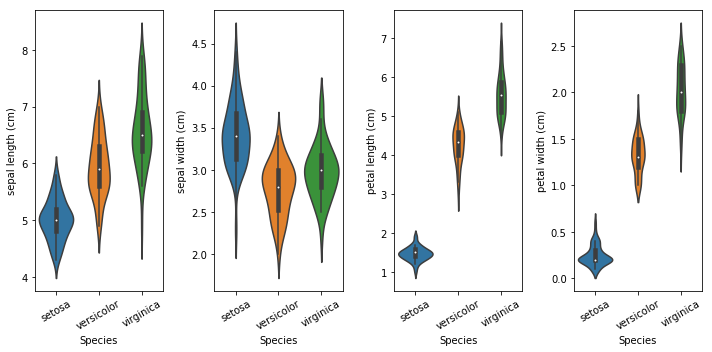

In [12]:
# 円グラフ
labels = iris.target_names
print("変数labels: ", labels)
features = df.columns[:-1]
print("変数features: \n", features)
fig = plt.figure()
plt.pie(y.value_counts(ascending=True), 
        labels=labels[::-1], startangle=90, autopct="%.1f%%")
plt.show()

# 変数labelsは円グラフで作成済。
# boxplot
fig, axes = plt.subplots(1,4,figsize=(10,5))
for ax, feature in enumerate(features): # featureにはラベル列を含めない
    sns.boxplot(x="Species", y=feature, data=df, ax=axes[ax])
    axes[ax].set_xticklabels(labels, rotation=30)
plt.tight_layout()
plt.show()

# violinplot
fig, axes = plt.subplots(1,4,figsize=(10,5))
for ax, feature in enumerate(features): # featureにはラベル列を含めない
    sns.violinplot(x="Species", y=feature, data=df, ax=axes[ax])
    axes[ax].set_xticklabels(labels, rotation=30)
plt.tight_layout()
plt.show()

boxplotは四分位数に基づく箱ひげ図、violinplotは分布で各数値データを表現する。
箱ひげ図は要約統計量の情報のみが含まれるのに対し、バイオリン図には全分布データが含まれるので、
分布に複数のピーク（マルチモーダル）がある場合に特に有用。
バイオリン図にも平均と四分位範囲が含まれているが、知名度が低いので、一般的には理解されにくい。

## 7. 特徴量間の関係の確認
特徴量間の関係を見ていく。  
- 縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る
- 全ての組み合わせの散布図を一度に表示させる、散布図行列を作る
- ４つの特徴量に関する相関係数行列を作る
- 相関係数行列のヒートマップを作る

2つの特徴量のタプルのリスト：
 [('sepal length (cm)', 'sepal width (cm)'), ('sepal length (cm)', 'petal length (cm)'), ('sepal length (cm)', 'petal width (cm)'), ('sepal width (cm)', 'petal length (cm)'), ('sepal width (cm)', 'petal width (cm)'), ('petal length (cm)', 'petal width (cm)')]


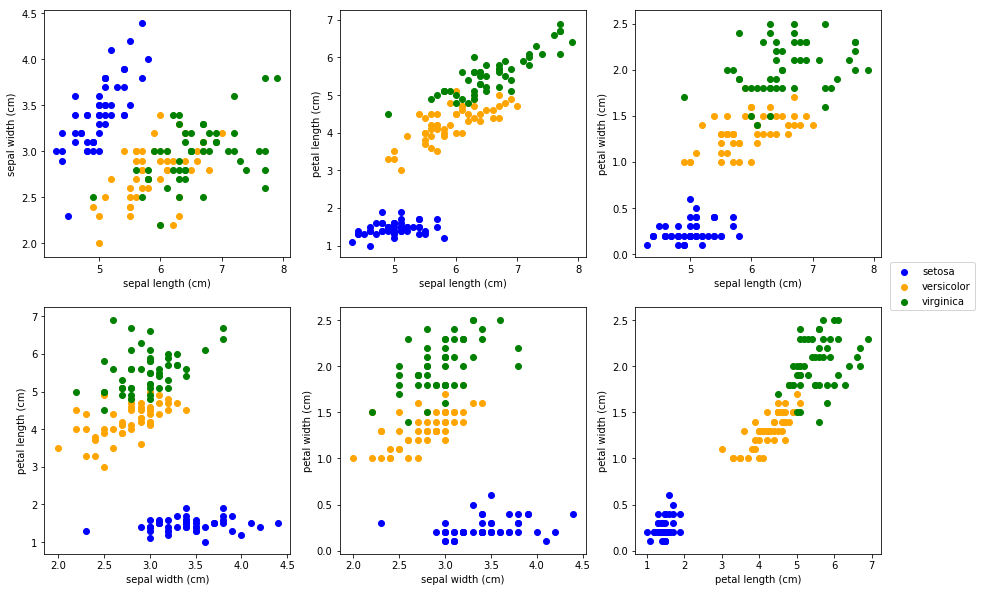

/Users/arimoto/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


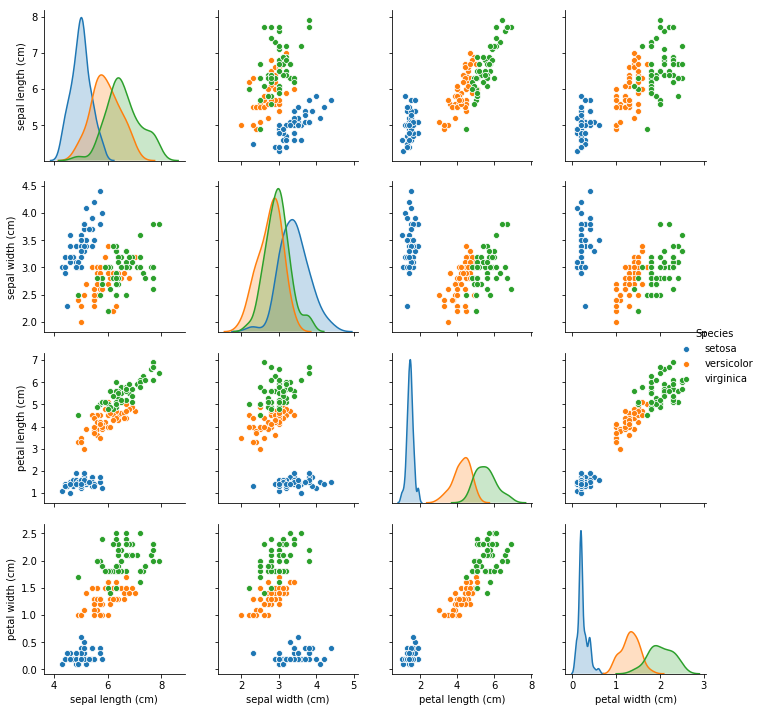

４つの特徴量に関する相関係数行列:
 [[ 1.         -0.10936925  0.87175416  0.81795363]
 [-0.10936925  1.         -0.4205161  -0.35654409]
 [ 0.87175416 -0.4205161   1.          0.9627571 ]
 [ 0.81795363 -0.35654409  0.9627571   1.        ]]


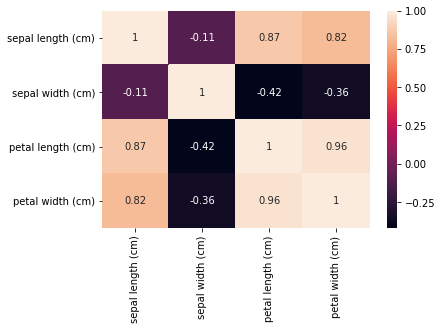

In [13]:
# 縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図
combinations = list(itertools.combinations(features, 2)) # 変数featuresは6. で作成済。
print("2つの特徴量のタプルのリスト：\n", combinations)

fig, axes = plt.subplots(2,3,figsize=(15,10)) # 2行3列の2次元特徴量プロットを作成する
for ax, two_features in enumerate(combinations):
    plt.subplot(2,3,ax+1)
    # 各ラベルで色分け。変数labelsは6. で作成済。
    for species_num, color, label in zip(np.arange(3), np.array(["blue","orange","green"]), labels): 
        plt.scatter(
            df[df["Species"]==species_num][two_features[0]],  # 各ラベルと、2変量のうち0番目をx軸に
            df[df["Species"]==species_num][two_features[1]],  # 各ラベルと、2変量のうち1番目をy軸に
            color=color, label=label)
        plt.xlabel(two_features[0])
        plt.ylabel(two_features[1])
plt.legend(loc="upper right", bbox_to_anchor=(1.4,1.2)) # 6番目の図からの相対的な位置で凡例を指定
plt.show()

# 散布図行列
pairplot = sns.pairplot(df, vars=features, hue="Species") # プロットするデータにはラベルを含めない。変数featuresは6. で作成済。
for t, l in zip(pairplot._legend.texts, labels): # 凡例を各アヤメの名前に変更。変数labelsは6. で作成済。
     t.set_text(l)
plt.show()

# 相関係数行列
corrcoef_matrix = np.corrcoef(df.iloc[:, :-1].T.values) # 行間で相関を見るので転置
print("４つの特徴量に関する相関係数行列:\n", corrcoef_matrix)

# ヒートマップ
sns.heatmap(corrcoef_matrix, annot=True,  # 各相関係数の値をヒートマップ上に表示するのでannotはTrue
            xticklabels=features, 
            yticklabels=features)
plt.show()

## 8. 簡単な考察
散布図行列を見ながら、3種類の花はどういう風に分けられそうかを簡単に考えて説明する。

全ての特徴量の組み合わせにおいて、サポートベクタマシンでsetosa（青点）は明確に分類できるように見える。petal lengthとpetal width、petal lengthとsepal widthにおいて、高い精度でversicolorとverginicaも分類できるように見える。過学習をできるだけ抑えれば、ランダムフォレストやカーネルSVMでもうまくいくかもしれない。